0 50.38547134399414
1 49.476600646972656
2 48.71092224121094
3 48.06317138671875
4 47.5125846862793
5 47.04204559326172
6 46.637474060058594
7 46.287269592285156
8 45.981903076171875
9 45.713504791259766
10 45.4755973815918
11 45.26286315917969
12 45.070899963378906
13 44.89609909057617
14 44.73548126220703
15 44.58660125732422
16 44.44743728637695
17 44.31632995605469
18 44.19190216064453
19 44.073028564453125
20 43.95878601074219
21 43.84840393066406
22 43.74125671386719
23 43.636817932128906
24 43.53466796875
25 43.43445587158203
26 43.335880279541016
27 43.238712310791016
28 43.14274597167969
29 43.047828674316406
30 42.953826904296875
31 42.86061477661133
32 42.76811599731445
33 42.676246643066406
34 42.58495330810547
35 42.494178771972656
36 42.40387725830078
37 42.31402587890625
38 42.22458267211914
39 42.13553237915039
40 42.04684829711914
41 41.958518981933594
42 41.87052917480469
43 41.782867431640625
44 41.69552230834961
45 41.60848617553711
46 41.521751403808594
47 41.43531

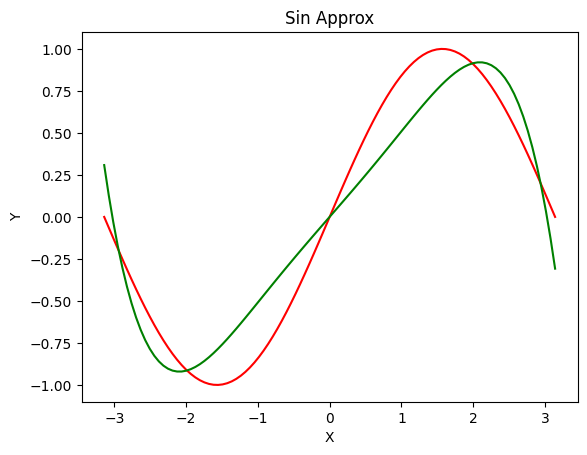

In [14]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 100, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
std = 1e-3
a = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
b = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
c = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
d = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
e = torch.normal(0, std, (), dtype=dtype, requires_grad=True)
f = torch.normal(0, std, (), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(20000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + (b * x) + (c * x ** 2) + (d * x ** 3) + (e * x ** 4) + (f * x ** 5)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t < 100 or t % 100 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        e -= learning_rate * e.grad
        f -= learning_rate * f.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        e.grad = None
        f.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4 + {f.item()} x^5')


_y = []

for _x in x:
    res = math.sin(_x)
    approx_res = a + (b * _x) + (c * _x ** 2) + (d * _x ** 3) + (e * _x ** 4) + (f * _x ** 5)
    _y.append(approx_res)


plt.plot(torch.Tensor.cpu(x), torch.Tensor.cpu(y), color='r', label='sin')
plt.plot(torch.Tensor.cpu(x), torch.Tensor.cpu(torch.tensor(_y)), color='g', label='approx')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Sin Approx")
plt.show()
